# Intro

This notebook presents a classic approach of extracting knowledge graphs from structured knowledge bases like DbPedia.

# Lib imports

In [1]:
import networkx as nx
import io
import pydotplus
import pyvis as pv

from IPython.display import HTML
from SPARQLWrapper import SPARQLWrapper, RDF
from rdflib import Graph, URIRef
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
from rdflib.tools.rdf2dot import rdf2dot

from IPython.display import display, Image

# Query dbpedia

We will start by querying dbpedia for a proper information. We will use a **construct** query that will extarct UE countries and their government forms.

We will need to utilize couple of libraries in the process:

1. SPARQLWrapper will execute the query and return the results.
2. Query results will be transformed to RDF triplets.
3. We will feed these triplets to RDF Lib building the graph.

In [2]:
# Prepare SPARQL wrapper
sparql = SPARQLWrapper("http://dbpedia.org/sparql")
sparql.addDefaultGraph("http://dbpedia.org")

# Read the query
query = open("dbpedia_query_construct.rq", "r").read()
sparql.setQuery(query)

# Get results as RDF
sparql.setReturnFormat(RDF)
results = sparql.query()

# Extract subject-rel-object triplets
triplets = results.convert()

/home/fwojcik/anaconda3/envs/py39clean/lib/python3.9/site-packages/SPARQLWrapper/Wrapper.py:794: RuntimeWarning: Sending Accept header '*/*' because unexpected returned format 'rdf' in a 'CONSTRUCT' SPARQL query form
  warnings.warn(


Now we buila a Graph using RDFLib and put triplets in it.

In [3]:
g = Graph()
g += triplets

# RDF graph investigation

We can now inspect the graph, execute predicate queries, visualize structures, etc.

In [4]:
set(g.predicates())

{rdflib.term.URIRef('http://dbpedia.org/ontology/governmentType'),
 rdflib.term.URIRef('http://dbpedia.org/ontology/legislature'),
 rdflib.term.URIRef('http://dbpedia.org/property/currencyCode'),
 rdflib.term.URIRef('http://purl.org/dc/terms/subject'),
 rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label')}

In [6]:
subject_objects = list(g.subject_objects(predicate=URIRef('http://dbpedia.org/property/currencyCode')))
subject_objects[:5]

[(rdflib.term.URIRef('http://dbpedia.org/resource/Latvia'),
  rdflib.term.Literal('EUR', lang='en')),
 (rdflib.term.URIRef('http://dbpedia.org/resource/Slovenia'),
  rdflib.term.Literal('EUR', lang='en')),
 (rdflib.term.URIRef('http://dbpedia.org/resource/Spain'),
  rdflib.term.Literal('EUR', lang='en')),
 (rdflib.term.URIRef('http://dbpedia.org/resource/Italy'),
  rdflib.term.Literal('EUR', lang='en')),
 (rdflib.term.URIRef('http://dbpedia.org/resource/Portugal'),
  rdflib.term.Literal('EUR', lang='en'))]

Below we make a large, structured plot of the graph. Probably you'll have to zoom in to see it.

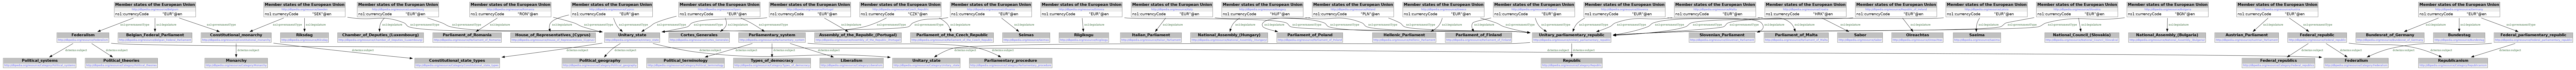

In [8]:
def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png))

visualize(g)

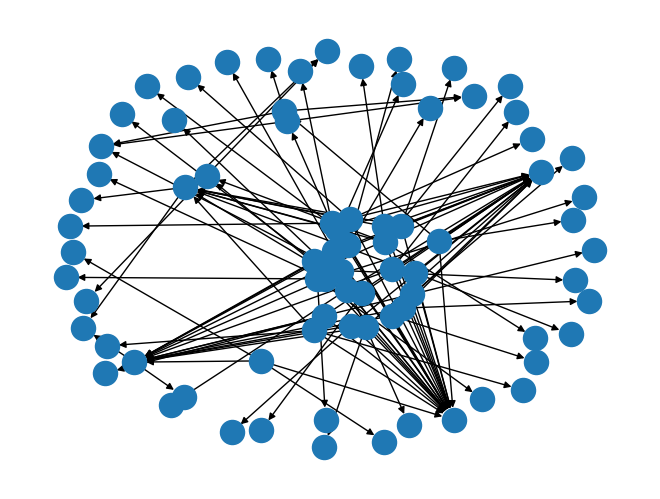

In [9]:
nx_graph = rdflib_to_networkx_multidigraph(g)
nx.draw(nx_graph)

In [10]:
net = pv.network.Network('1000px', '1000px', notebook=True)
net.from_nx(nx_graph)
net.show("network_graph.html")
HTML(filename='network_graph.html')

network_graph.html
